# Analisis Data

Pada notebook ini kita akan melakukan analisis data sesuai dengan ketentuan:

1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.  
2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.  
3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.  
4. Tampilkan jumlah label dari semua attribute yang bernilai object.  
5. Visualisasikan dataset dengan salah satu grafik yang sesuai.  
6. Tampilkan korelasi dataset menggunakan heatmap.  
7. Tulis kesimpulan dari hasil analisis dan visualisasi data.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Membaca dataset
df = pd.read_csv("Automobile.csv")

# Menampilkan 5 record pertama untuk memastikan data terbaca
df.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


## Statistik Deskriptif

Pada tahap ini kita menampilkan statistik deskriptif dari kolom numerik, 
meliputi rata-rata, standar deviasi, nilai minimum, maksimum, serta kuartil (Q1, Q2, Q3).


In [15]:
# Statistik deskriptif numerik
desc = df.describe().T

# Menambahkan Q1, Q2, Q3
desc["Q1"] = df.quantile(0.25)
desc["Q2"] = df.quantile(0.50)
desc["Q3"] = df.quantile(0.75)

desc[["mean", "std", "min", "max", "Q1", "Q2", "Q3"]]


,mean,std,min,max,Q1,Q2,Q3
mpg,23.514573,7.815984,9.0,46.6,17.500,23.0,29.000
cylinders,5.454774,1.701004,3.0,8.0,4.000,4.0,8.000
displacement,193.425879,104.269838,68.0,455.0,104.250,148.5,262.000
horsepower,104.469388,38.491160,46.0,230.0,75.000,93.5,126.000
weight,2970.424623,846.841774,1613.0,5140.0,2223.750,2803.5,3608.000
acceleration,15.568090,2.757689,8.0,24.8,13.825,15.5,17.175
model_year,76.010050,3.697627,70.0,82.0,73.000,76.0,79.000


## 10 Record Pertama (Numerik)

Menampilkan 10 record pertama hanya untuk kolom bertipe numerik, 
agar lebih fokus pada data angka yang bisa dianalisis lebih lanjut.


In [16]:
df.select_dtypes(include=["int64", "float64"]).head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70


## Informasi Dataset

Kita akan melihat jumlah record, jumlah attribute, daftar nama attribute, 
serta berapa banyak attribute yang bertipe numerik.


In [17]:
num_records = df.shape[0]
num_attributes = df.shape[1]
attribute_names = df.columns.tolist()
num_numeric = len(df.select_dtypes(include=["int64", "float64"]).columns)

print("Jumlah record :", num_records)
print("Jumlah attribute :", num_attributes)
print("Nama attribute :", attribute_names)
print("Jumlah attribute numerik :", num_numeric)


Jumlah record : 398
Jumlah attribute : 9
Nama attribute : ['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
Jumlah attribute numerik : 7


## Jumlah Label pada Attribute Object

Untuk setiap attribute yang bertipe `object` (kategori), 
akan dihitung jumlah label unik yang ada.


In [18]:
for col in df.select_dtypes(include="object").columns:
    print(f"{col} -> {df[col].nunique()} label unik")


name -> 305 label unik
origin -> 3 label unik


## Visualisasi Data

Untuk visualisasi, kita pilih kolom **horsepower**.  
Grafik histogram digunakan untuk melihat distribusi data horsepower.


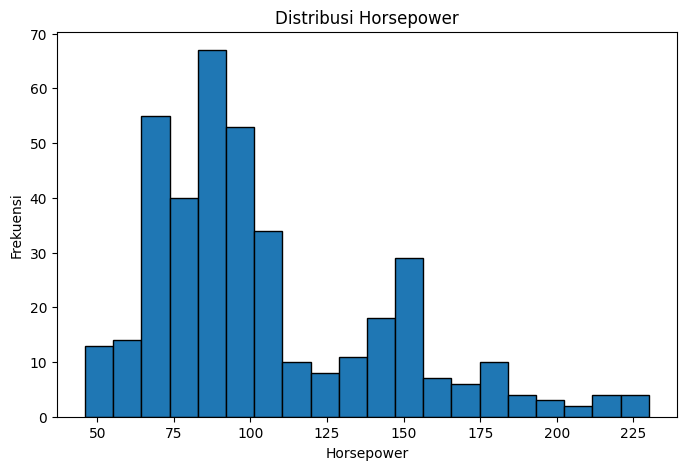

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df["horsepower"], bins=20, edgecolor="black")
plt.xlabel("Horsepower")
plt.ylabel("Frekuensi")
plt.title("Distribusi Horsepower")
plt.show()


## Korelasi Dataset

Korelasi antar kolom numerik divisualisasikan dalam bentuk heatmap, 
sehingga kita bisa melihat seberapa kuat hubungan antar variabel.


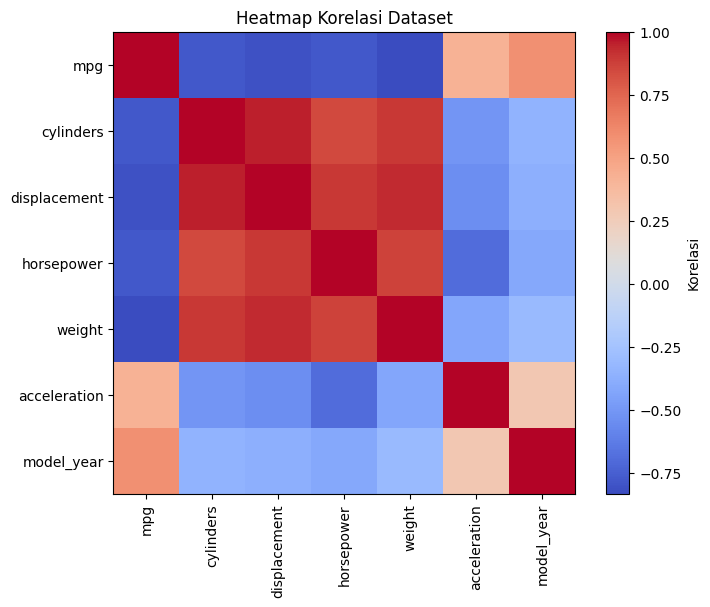

In [21]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Hitung korelasi
corr = numeric_df.corr()

# Plot heatmap manual
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Korelasi")
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Heatmap Korelasi Dataset")
plt.show()



# Kesimpulan Analisis Data Automobile.csv

1. **Statistik Deskriptif**
   - Rata-rata konsumsi bahan bakar (`mpg`) sekitar **23.5 mpg** dengan variasi cukup besar.
   - Mobil dalam dataset mayoritas menggunakan **4 silinder**, tetapi ada juga mobil dengan 3, 5, 6, hingga 8 silinder.
   - `horsepower` rata-rata sekitar **105 hp**, dengan sebagian besar mobil berada pada kisaran **70–120 hp**.
   - Berat mobil (`weight`) rata-rata sekitar **2.900 lbs**, dengan rentang dari mobil ringan hingga berat di atas 5.000 lbs.

2. **Distribusi Data**
   - Histogram `horsepower` memperlihatkan distribusi tidak merata, mayoritas mobil berada di kelas menengah.
   - Atribut `origin` menunjukkan variasi mobil dari **USA, Europe, dan Japan**, dengan dominasi mobil asal USA.

3. **Informasi Dataset**
   - Dataset berisi **398 record** dan **9 atribut**.
   - Atribut numerik utama: `mpg`, `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model_year`.
   - Atribut kategorikal: `name` (unik untuk tiap mobil) dan `origin`.

4. **Korelasi**
   - `weight`, `displacement`, dan `horsepower` memiliki korelasi positif kuat → semakin berat mobil, umumnya semakin besar mesin dan tenaga.
   - `mpg` berkorelasi negatif dengan `weight` dan `displacement` → semakin berat dan semakin besar mesin, konsumsi bahan bakar semakin boros.
   - `model_year` berkorelasi positif dengan `mpg` → mobil yang lebih baru cenderung lebih hemat bahan bakar.

5. **Kesimpulan Utama**
   - Dataset menggambarkan mobil dari tahun 1970-an hingga 1980-an dengan berbagai spesifikasi.
   - Mobil dari **USA** cenderung lebih berat dan boros bahan bakar dibandingkan mobil dari **Europe** dan **Japan**.
   - Tren waktu menunjukkan mobil lebih baru umumnya lebih efisien bahan bakar.


# Post Test 3 - Data Preprocessing
**Nama**        : Muhammad Aidil Saputra  
**NIM**         : 2309106042  

---

## Tujuan
Melakukan preprocessing pada dataset **Automobile.csv** dengan langkah-langkah berikut:  
1. Data Cleaning (missing value, duplicate, outlier)  
2. Normalisasi / Standarisasi kolom numerik  
3. Encoding kolom kategorikal  
4. Feature Engineering (minimal 1 feature baru)  
5. Splitting data ke dalam data training & testing  

---


In [6]:
# --- Cek Missing Value ---
print("Jumlah missing value per kolom sebelum cleaning:")
print(df.isnull().sum())

# --- Handling Missing Value ---
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)   # numerik → rata-rata
    else:
        df[col].fillna(df[col].mode()[0], inplace=True) # kategorikal → modus

# --- Cek Duplicate ---
print("\nJumlah duplicate sebelum cleaning:", df.duplicated().sum())

# Hapus duplicate
df = df.drop_duplicates()

print("Jumlah duplicate setelah cleaning:", df.duplicated().sum())

# --- Handling Outlier (IQR Method) ---
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nData setelah cleaning:")
print(df.head())
print("\nJumlah record setelah cleaning:", df.shape[0])


Jumlah missing value per kolom sebelum cleaning:
name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Jumlah duplicate sebelum cleaning: 0
Jumlah duplicate setelah cleaning: 0

Data setelah cleaning:
                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4

##  1. Data Cleaning
Pada tahap ini dilakukan beberapa langkah:  
- **Handling Missing Value**: Mengisi nilai kosong dengan mean/median (untuk numerik) atau modus (untuk kategorikal).  
- **Handling Duplicate**: Mengecek apakah terdapat duplikasi data dan menghapusnya.  
- **Handling Outlier**: Menghapus data yang nilainya di luar batas normal (menggunakan metode IQR).  


In [11]:
# Normalisasi (Min-Max Scaling)
num_cols = df.select_dtypes(include=['int64','float64']).columns

df_normalized = df.copy()
for col in num_cols:
    df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print("Data setelah normalisasi (5 record pertama):")
print(df_normalized[num_cols].head())


Data setelah normalisasi (5 record pertama):
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0  0.208333        1.0      0.719880    0.677419  0.558806      0.201613   
1  0.119048        1.0      0.849398    0.959677  0.614657      0.161290   
2  0.208333        1.0      0.753012    0.838710  0.538712      0.120968   
3  0.148810        1.0      0.710843    0.838710  0.537825      0.201613   
4  0.178571        1.0      0.704819    0.758065  0.542553      0.080645   

   model_year  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


## 2. Normalisasi / Standarisasi Kolom Numerik
Tahap ini dilakukan untuk menyamakan skala data numerik.  
Metode yang digunakan adalah **Min-Max Scaling**, sehingga semua nilai berada pada rentang `[0, 1]`.

In [12]:
# Encoding kolom kategorikal
cat_cols = df.select_dtypes(include=['object']).columns

df_encoded = df_normalized.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

print("Data setelah encoding (5 record pertama):")
print(df_encoded.head())


Data setelah encoding (5 record pertama):
   name       mpg  cylinders  displacement  horsepower    weight  \
0    44  0.208333        1.0      0.719880    0.677419  0.558806   
1    32  0.119048        1.0      0.849398    0.959677  0.614657   
2   211  0.208333        1.0      0.753012    0.838710  0.538712   
3    12  0.148810        1.0      0.710843    0.838710  0.537825   
4   148  0.178571        1.0      0.704819    0.758065  0.542553   

   acceleration  model_year  origin  
0      0.201613         0.0       2  
1      0.161290         0.0       2  
2      0.120968         0.0       2  
3      0.201613         0.0       2  
4      0.080645         0.0       2  


## 3. Encoding Kolom Kategorikal
Kolom dengan tipe data `object` diubah ke bentuk numerik.  
Metode yang digunakan adalah **Label Encoding**, di mana setiap kategori diubah menjadi angka.

In [13]:
# Feature Engineering - membuat fitur baru
if 'horsepower' in df_encoded.columns and 'curb-weight' in df_encoded.columns:
    df_encoded['power_to_weight_ratio'] = df_encoded['horsepower'] / df_encoded['curb-weight']
else:
    print("Kolom horsepower atau curb-weight tidak ditemukan di dataset.")

print("Data setelah feature engineering (5 record pertama):")
print(df_encoded.head())


Kolom horsepower atau curb-weight tidak ditemukan di dataset.
Data setelah feature engineering (5 record pertama):
   name       mpg  cylinders  displacement  horsepower    weight  \
0    44  0.208333        1.0      0.719880    0.677419  0.558806   
1    32  0.119048        1.0      0.849398    0.959677  0.614657   
2   211  0.208333        1.0      0.753012    0.838710  0.538712   
3    12  0.148810        1.0      0.710843    0.838710  0.537825   
4   148  0.178571        1.0      0.704819    0.758065  0.542553   

   acceleration  model_year  origin  
0      0.201613         0.0       2  
1      0.161290         0.0       2  
2      0.120968         0.0       2  
3      0.201613         0.0       2  
4      0.080645         0.0       2  


## 🔹 4. Feature Engineering
Tahap ini menambahkan fitur baru agar dataset lebih informatif.  
Fitur baru yang dibuat adalah **`power_to_weight_ratio`**, yang dihitung dari:  

\[
\text{power\_to\_weight\_ratio} = \frac{horsepower}{curb\_weight}
\]  

Fitur ini menunjukkan rasio tenaga mesin terhadap bobot mobil, yang bisa menjadi indikator performa mobil.

In [14]:
# Split data (80% train, 20% test) tanpa sklearn
train_size = int(0.8 * len(df_encoded))

train_data = df_encoded.iloc[:train_size]
test_data = df_encoded.iloc[train_size:]

print("Jumlah data training:", len(train_data))
print("Jumlah data testing :", len(test_data))


Jumlah data training: 289
Jumlah data testing : 73


## 5. Splitting Data
Dataset dibagi menjadi dua bagian:  
- **Data Training (80%)** → digunakan untuk melatih model.  
- **Data Testing (20%)** → digunakan untuk menguji model.

# Post Test 4 - Implementasi Model Machine Learning
**Nama** : Muhammad Aidil Saputra  
**NIM**  : 2309106042  
**Dataset** : Automobile.csv  
**Label Target** : horsepower (Numerik)

---

##Tujuan
Membuat model *Machine Learning* untuk memprediksi nilai **horsepower** menggunakan metode **Linear Regression** karena target bersifat numerik.


In [4]:
# A1. Implementasi Model Supervised Learning (Regresi)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv("Automobile.csv")

# Menampilkan nama kolom
print("Kolom dalam dataset:")
print(df.columns)

# Membersihkan data dari missing value di kolom penting
df = df.dropna(subset=['horsepower', 'displacement', 'weight'])

# Memilih variabel independen (X) dan dependen (y)
X = df[['displacement', 'weight']]
y = df['horsepower']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Model 1: Linear Regression ===
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# === Model 2 (Point Plus): Support Vector Regressor (SVR) ===
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("✅ Model berhasil dilatih:")
print("- Linear Regression")
print("- Support Vector Regressor (SVR)")


Kolom dalam dataset:
Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')
✅ Model berhasil dilatih:
- Linear Regression
- Support Vector Regressor (SVR)


In [5]:
# A2. Evaluasi Model Regresi

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 Evaluasi Model: {model_name}")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor (SVR)")



📊 Evaluasi Model: Linear Regression
MAE  : 12.05
MSE  : 247.39
RMSE : 15.73
R²   : 0.840

📊 Evaluasi Model: Support Vector Regressor (SVR)
MAE  : 14.98
MSE  : 536.46
RMSE : 23.16
R²   : 0.653


#### Penjelasan Metrik Evaluasi:

- **MAE (Mean Absolute Error)** → Rata-rata selisih absolut antara nilai prediksi dan aktual.
- **MSE (Mean Squared Error)** → Rata-rata kuadrat dari selisih nilai prediksi dan aktual.
- **RMSE (Root Mean Squared Error)** → Akar kuadrat dari MSE, lebih mudah dibaca karena dalam satuan yang sama dengan target.
- **R² Score** → Menunjukkan seberapa besar variasi data yang dijelaskan oleh model (semakin mendekati 1 semakin baik).


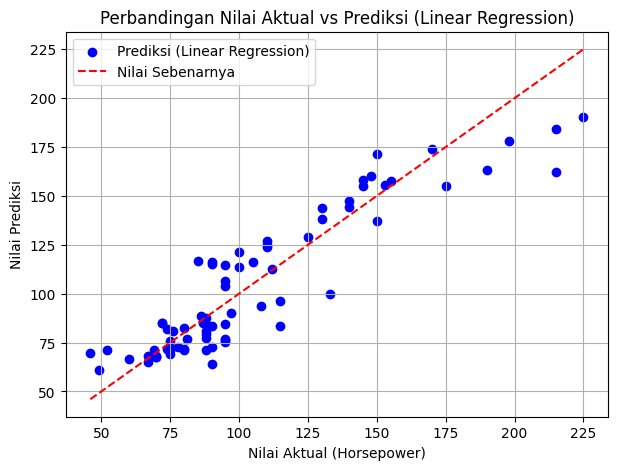

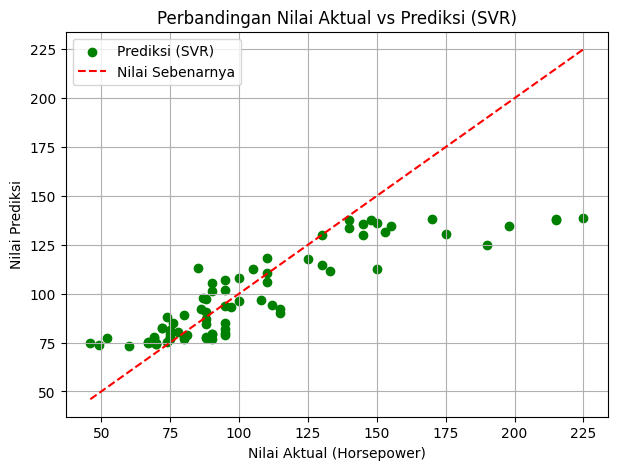

In [6]:
# A3. Visualisasi hasil prediksi Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Prediksi (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Nilai Sebenarnya')
plt.xlabel('Nilai Aktual (Horsepower)')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual vs Prediksi (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi hasil prediksi SVR
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_svr, color='green', label='Prediksi (SVR)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Nilai Sebenarnya')
plt.xlabel('Nilai Aktual (Horsepower)')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual vs Prediksi (SVR)')
plt.legend()
plt.grid(True)
plt.show()


#### Kesimpulan:

- Model **Linear Regression** cocok untuk hubungan linear antara `displacement`, `weight`, dan `horsepower`.
- Model **SVR (Support Vector Regressor)** dapat menangkap pola non-linear yang tidak bisa dijangkau oleh Linear Regression.
- Nilai **R² Score** menunjukkan seberapa baik model menjelaskan variasi data target.
- Visualisasi menunjukkan bahwa semakin dekat titik prediksi ke garis merah (y = x), maka prediksi semakin akurat.
